# Resumen del trabajo realizado

**Errores o datos faltantes encontrados:**
1. Se encontraron 14 columnas que eran 100% nulas para todos los registros
2. Se encontraron 238 registros que tienen más del 10% de sus columnas en valores nulos
3. Se encontraron dos claves(PK) repetidas/duplicadas con distintos registros
4. Se encontró 1 registro nulo en la columna "fecha de nacimiento/fecnaca" de 431 registros   
5. Se encontraron 419 datos faltantes para la columna 'fechbaja'
6. Se encontró 1 registro con números en la columna "pedi"
7. Se encontró 1 registro con números en la columna "ocupap"
8. Se econtraron 2 estudiantes con el mismo padre&madre (herman@s) donde 1 de los dos registros del padre no cuenta con el email
9. Se encotraron números telefonicos de los padres en formato cientificos
10. Se encontraron errores de escritura en la columna de nacionalidad y en la columna de pobla.
11. Se encontraron errores de I mayuscula e i minuscula, asi como algunos caracteres erroneos suelen ser producto de una mala lectura por parte de un Optical character recognition (OCR).


**Decisiones tomadas:**
1. Se eliminaron las columnas que no tenian ni un solo valor que no fuera null en el dataframe (columnas: "codigo", "transporta", "apellido"...)
2. Se eliminaron las columnas como edad, capturado y grupo con un solo valor único que no proporcionaba información relevante
3. Se asignó una clave única no existente 3993
4. Se convirtió el único registros que no cumplia el formato de fecha  en la columna fecnaca para convertirlo a NaT
5. Se convirtieron todos los registros que no cumplian el formato de fecha para convertirlos a NaT
6. Se eliminaron las columnas originales de fechas debido a que era una copia sucia de las nuevas columnas agregadas
7. Se convirtió a null el único registro de fecha que era mayor a 2024
8. Se transformó un dígito dentro del texto de la columna 'pedi' en información más coherente
9. Se transformó un dígito dentro del texto de la columna 'ocupap' en información más coherente
10. Se rellenó los valores de emailp basado en otros registros que tengan emailp de estudiantes con la misma madre
11.  Se filtraron y limpiaron numeros telefonicos de la madre:
    * 364 registros de celulares de las madres de Mexico son validos
    * 7 numeros posibles del extranjero
    * 5 numeros eran invalidos
    * El resto son nulos
12. Se filtraron y limpiaron numeros telefonicos del padre:
    * 329 registros de celulares de los padres de Mexico son validos
    *  6 numeros de telefonos de padres que pueden provenir del extranjero, de otro codigo de area en mexico
    * 4 no ran válidos
    * El resto son nulos
13. Se filtró y limpió 378 numeros telefonicos validos de estudiantes, el resto pertencen posiblemente a numeros de casas y otrso son inválidos
14. Se estandarizó todas las columnas de texto a minúsculas excepto la columna de 'sexo'
15. Se creó una columna de 'edad' creada a partir de la fecha de nacimiento y la fecha actual
16. Se limpió los caracteres inoportunos dentro de la columna 'pedi'
17. Se limpió los errores de transcripción en la columna 'pobla'

**Analisis realizado:**
1. Análisis sobre columnas con datos faltantes (apellidos, matricula, ...)
2. Porcentaje de valores nulos por columna
3. Error de concurrencia/race conditions a la hora de incluir la clave
4. Se analizó los maximos y minimos de las columnas fechas para encontrar incongruencias en las mismas
5. Se encontraron registros en la columna empresa **totalmente** numericos
6. Se verificó que los email de los padres fueran válidos:
    * 225 pasaron el filtrado
    * 206 no pasaron
    * 50 emails fueron corregidos
    * Quedaron 2 emails invalidos despues del proceso de limpieza y filtrado
    * El resto eran nulos
7. Se verificó que los email de las madres fueran válidos:
    * 286 pasaron el filtrado
    * 145 no pasaron
    * 48 tenian errores de escritura
    * 44 emails fueron corregidos
    * Quedaron 4 NO VALIDOS ya que no tienen la suficiente informacion o validez
    * El resto eran nulos.
8. Se supuso que las madres normalmente son las que llenan el formulario de los niños en el colegio ya que tienen pocos correos faltantes a comparación de los padres
9. Se realizó un análisis de la columna grado, donde:
  * Grado 0 el que menos estudiantes tiene asignado (aproximadamente un 4,2%)
  * Grado 3 con el mayor numero de estudiantes (aproximadamente un 26,5%)
10. Se realizó un análisis de nacionalidad, donde:
  * Aproximadamente el 99.1% son estudiantes mexicanos
  * Aproximadamente el 0.23% pertence a la poblacion china.
  Siendo el caso atípico nacionalidad china
11. Se realizó un análisis de la columna pobla, donde:
  * La gran mayoria de estudiantes, aproximadamente el 61% vienen de texcoco
  * El porcentaje de otras direcciones es muy bajo en comparacion (siendo el segundo CHICONCUAC con casi 11%)
12. Se realizó un análisis de género, donde:
  * El porcentaje tanto de niñas como varones es muy similar, siendo el género masculino aproximadamente un 3% mas que el genero femenino
13. Se realizó un análisis en la columna escpro donde se encontró que COLEGIO1 es la clase predominante en los datos con mas del 78%
14. Se realizó un análisis sobre la edad de los estudiantes del colegio.
  * Hay 4 casos atípicos como estudiantes de 2,3,17,23.
  Se puede deber a errores de trasncripción, o en las edades mas altas, estudiantes que:
  * 1- Se ha atrasado mucho en la colegiatura
  * 2- Es un dato de un estudiante 'graduado' que nunca actualizaron
  * 3- Un error de escritura/transcripcion
15. Se realizó una matriz de correlación que dió positiva en edad-nivel con (0.84). Lo que significa que a medida que edad aumenta, nivel tiende también a aumentar.


#1-Cargar y explorar los datos

Se importan varias librerias de visualizacion, manejo de fechas, tiempo, calculos matematicos y pandas, el cual es una libreria de python que nos permitira manipular archivos de excel o CSVs como objetos de tipo data frames

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

Al momento de importar el archivo se tiene que usar un enconding distinto a ***utf8*** si no arroja un error, en este caso **latin-1** funciona

In [146]:
df = pd.read_csv("Datos_alumnos_y_Padres.csv", encoding='latin-1')

El numero de filas inicial en el dataframe (sin modificaciones, transformaciones y otros...)

In [147]:
df.shape[0]

431

El numero de columnas inicial en el dataframe (sin modificaciones, transformaciones y otros...)

In [148]:
df.shape[1]

52

Se observan las siguientes columnas en el dataframe inicial

In [149]:
list(df.columns)

['clave',
 'digito',
 'digban',
 'nombrea',
 'sexo',
 'domal',
 'coloa',
 'pobla',
 'cpa',
 'fecnaca',
 'naciona',
 'tela',
 'nivel',
 'grado',
 'grupo',
 'escpro',
 'porcol',
 'porins',
 'codigo',
 'madre',
 'ocupam',
 'emprem',
 'celularm',
 'telofm',
 'emailm',
 'padre',
 'ocupap',
 'emprep',
 'celularp',
 'telofp',
 'emailp',
 'pedi',
 'telpedi',
 'transporta',
 'factura',
 'factura1',
 'ciclo',
 'fechains',
 'fechbaja',
 'plan',
 'apellidos',
 'apellidop',
 'apellidom',
 'nombres',
 'snombre',
 'matricula',
 'nombrecort',
 'credito',
 'cuenta',
 'inscribe',
 'edad',
 'capturado']

Se procede a hacer una inspeccion rápida que puede arrojar informacion util sobre las columnas y los valores de los registros, tales como conteos, percentiles, maximos, minimos, desviacion estandar, entre otros...

In [150]:
df.describe()

,clave,digito,digban,cpa,nivel,grado,porcol,porins,codigo,celularp,...,apellidop,apellidom,nombres,snombre,matricula,nombrecort,credito,cuenta,inscribe,edad
count,431.000000,431.000000,431.000000,417.000000,431.000000,431.000000,431.000000,431.000000,0.0,3.350000e+02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,431.0
mean,3593.941995,0.013921,52.638051,55429.556355,1.104408,2.765661,93.900232,80.668213,NaN,5.574030e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
std,308.836005,0.245501,27.952931,5824.855395,0.689290,1.634890,22.532391,66.705802,NaN,6.977634e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,2632.000000,0.000000,3.000000,5611.000000,0.000000,0.000000,0.000000,0.000000,NaN,5.514298e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
25%,3404.500000,0.000000,28.500000,56120.000000,1.000000,1.000000,100.000000,75.000000,NaN,5.530614e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
50%,3666.000000,0.000000,54.000000,56213.000000,1.000000,3.000000,100.000000,75.000000,NaN,5.545257e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
75%,3852.500000,0.000000,77.000000,56255.000000,2.000000,4.000000,100.000000,75.000000,NaN,5.579884e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
max,3992.000000,5.000000,99.000000,57000.000000,2.000000,6.000000,100.000000,751.000000,NaN,9.361062e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


Cabe destacar que las columnas con valores NO NUMERICOS no se muestran en este analisis numerico

#2-Limpieza de datos

## -Manejo de valores Faltantes



Primero voy a revisar cuantas filas tienen aunque sea un valor nulo, con esto me doy una idea de que tanta limpieza sera necesaria

In [151]:
sum(df.isnull().any(axis=1))

431

Lastimosamente, todos los registros cuentan con al menos un nulo en sus columnas, esto podria indicar que hay una columna o muchas columnas con todos los valores nulos (columnas sin valor).

Procedo a hacer la misma evaluacion pero a nivel de columnas, imprimo aquellas columnas que tienen por lo menos un nulo en sus valores

In [152]:
columnas_con_valores_nulos = df.columns[df.isna().any()].tolist()
len(columnas_con_valores_nulos)

36

Procedo a revisar los nombres de esas 36 columnas que tienen aunque sea un nulo en sus valores

In [153]:
columnas_con_valores_nulos

['domal',
 'coloa',
 'pobla',
 'cpa',
 'naciona',
 'tela',
 'escpro',
 'codigo',
 'madre',
 'ocupam',
 'emprem',
 'celularm',
 'telofm',
 'emailm',
 'padre',
 'ocupap',
 'emprep',
 'celularp',
 'telofp',
 'emailp',
 'pedi',
 'telpedi',
 'transporta',
 'factura',
 'factura1',
 'ciclo',
 'apellidos',
 'apellidop',
 'apellidom',
 'nombres',
 'snombre',
 'matricula',
 'nombrecort',
 'credito',
 'cuenta',
 'inscribe']

Se encontro que 36 columnas cuentan con al menos un nulo, lo que quiere decir que si son 52 columnas del df en total, deben haber 16 columnas cuyos valores estan completos para todos los registros

In [154]:
df.loc[:, columnas_con_valores_nulos].isnull().mean() * 100

domal           0.928074
coloa           0.928074
pobla           1.624130
cpa             3.248260
naciona         0.696056
tela            7.424594
escpro          3.248260
codigo        100.000000
madre           0.928074
ocupam          3.016241
emprem         27.610209
celularm       13.689095
telofm         60.092807
emailm         21.809745
padre           5.104408
ocupap          6.728538
emprep         25.986079
celularp       22.273782
telofp         51.740139
emailp         35.730858
pedi           18.329466
telpedi        26.682135
transporta    100.000000
factura        95.127610
factura1      100.000000
ciclo         100.000000
apellidos     100.000000
apellidop     100.000000
apellidom     100.000000
nombres       100.000000
snombre       100.000000
matricula     100.000000
nombrecort    100.000000
credito       100.000000
cuenta        100.000000
inscribe      100.000000
dtype: float64

***1era Decision tomada:***

Eliminare todas las columnas cuales tengan un porcentaje de 100% de valores nulos incluyendo factura, ya que el 96% de sus datos son nulos
(se podría evaluar no quitarlo).

***Explicacion:*** Decidi eliminar esas columnas ya que al tener todos sus valores en nulos, no aporta ninguna informacion real a los registros de alumnos. así que no veo relevantes mantenerlas en el data frame, en caso de necesitar esas columnas luego, procedere a crearlas.

In [155]:
lista_columnas_a_eliminar = ["codigo", "factura1", "ciclo", "apellidos", "apellidop", "apellidom", "nombres", "snombre", "matricula", "nombrecort", "credito", "cuenta", "inscribe", "transporta"]
len(lista_columnas_a_eliminar)

14

In [156]:
df = df.drop(lista_columnas_a_eliminar, axis=1)

### Estadisticas sobre valores faltantes:

1.   (Punto 1 del resumen de Análisis) Número total de valores faltantes y el análisis del porqué están nulas:
      > 14 de 52 columnas tienen el 100% de sus datos nulos.

      > La columna de apellidos, apellidosp, apellidosm estan 100% nulas debido a que la columna nombre, appelidosm, apellidosp tiene el nombre completo del estudiante, de la madre y del padre

      >las columnas como matricula, credito, cuenta, incribe, factura1 pueden estar nulas debido a que estan dentro de una tabla distinta llamada 'datos de pago'



2.   (Punto 2 del resumen de análisis) Porcentaje de valores faltantes:
      > domal tiene  0.93 % de datos nulos

      > coloa           0.93% de datos nulos

      > pobla           1.62% de datos nulos

      > cpa             3.25% de datos nulos

      > naciona         0.70% de datos nulos

      >  tela            7.42% de datos nulos

      >  escpro          3.25% de datos nulos

      > madre           0.93% de datos nulos

      >  ocupam          3.02% de datos nulos

      > emprem         27.61% de datos nulos

      > celularm       13.69% de datos nulos

      > telofm         60.09% de datos nulos

      > emailm         21.8% de datos nulos

      > padre           5.10% de datos nulos

      > ocupap          6.73% de datos nulos

      >  emprep         25.99% de datos nulos

      > celularp       22.27% de datos nulos

      >  telofp         51.74% de datos nulos

      >  emailp         35.73% de datos nulos

      >  pedi           18.33% de datos nulos

      > telpedi        26.68% de datos nulos


In [157]:
df = df.dropna(how='all')

No habian registros con todos los valores nulos, ahora se revisara valores unicos para hallar inconsistencias

## -Manejo de inconsistencias

Se procede a evaluar cuantos valores unicos tiene cada columna, con el fin de encontrar columnas que no aporten informacion suficiente

In [158]:
for col in df:
    print(col, len(df[col].unique()))

clave 430
digito 3
digban 97
nombrea 431
sexo 2
domal 385
coloa 173
pobla 66
cpa 83
fecnaca 407
naciona 19
tela 337
nivel 3
grado 7
grupo 1
escpro 39
porcol 10
porins 14
madre 370
ocupam 156
emprem 196
celularm 302
telofm 150
emailm 292
padre 356
ocupap 155
emprep 219
celularp 266
telofp 179
emailp 242
pedi 260
telpedi 188
factura 22
fechains 116
fechbaja 12
plan 2
edad 1
capturado 1


***2da Decision tomada:***

Eliminare las columnas como edad, capturado y grupo con un solo valor único  

***Explicacion:*** Se puede evidenciar no nos proporcionan nada de informacion en este caso al todos los elementos tener el mismo valor. Por lo tanto procederemos a descartarlo

* En el caso de edad su único valor fue 0
* En el caso de grupo su valor único fue A
* En el caso de capturado es Falso



In [159]:
columnas_con_un_unico_value = ["edad", "capturado", "grupo"]
df = df.drop(columnas_con_un_unico_value, axis=1)
len(df.columns)

35

Luego de haber eliminado las columnas que no proporcionaban información relevante. En el dataframe solo quedaron 35 columnas

Se procederá a buscar si hay registros en el que mas de 60% de sus columnas sean valor nulos:

In [160]:
((df.isnull().sum(axis=1)/len(df.columns)) > 0.6).sum()

0

Se procederá a buscar si hay registros en el que mas de 30% de sus columnas sean valor nulos:

In [161]:
((df.isnull().sum(axis=1)/len(df.columns)) > 0.3).sum()

9

Se procederá a buscar si hay registros en el que mas de 10% de sus columnas sean valor nulos:

In [162]:
((df.isnull().sum(axis=1)/len(df.columns)) > 0.1).sum()

238

**(2. Resumen Errores o datos faltantes encontrados)**

Como se puede evidenciar en los anteriores resultados hay una gran cantidad de registros (238) que tienen mas del 10% de sus columnas en valores nulos, al ser tan grande este numero no se considerara el eliminar registros por calidad de informacion, en un ambiente de produccion si valdria tener un porcentaje de minimo porcentaje en nulo si no se descarta el registro, valor o se retorna un error

Con respecto al manejo de los valores nulos, podría intentarse rellenar con información que tenga sentido como la media (en el caso de columnas numericas) pero en la realidad estos datos son independientes unos de otros por lo tanto añadir información no real puede ser peligroso para posteriores entrenamientos de modelos de Machine learning o puede llevar a posibles mal entendidos a la hora de interpretar gráficas o visualizaciones

## -Manejo de duplicados

Primero, es indispensable hallar una llave primaria que permita identificar rapidamente posibles duplicados, echando un vistazo en las columnas, se puede identificar la columna: "clave" como una posible llave única


In [163]:
# clave = df["clave"]
# df[clave.isin(clave[clave.duplicated()])].sort_values("clave")

**(Punto 3. Resumen Errores o datos faltantes encontrados)**

Se encontraton 2 claves repetidas, y al observar los resultados anteriores de unicidad por columna.

Efectivamente hay solo un registro que tiene duplicada clave

**(Punto 3.Resumen Analisis realizado)**

Al comparar la informacion del dato duplicado y al no encontrar mas registros con el mismo nombre puedo suponer/asumir que este fue un error de concurrencia/race conditions a la hora de incluir la clave y que ademas la base de datos no tenia como llave primaria "clave", se puede evaluar una llave primaria compuesta

In [164]:
min(df.clave), max(df.clave), max(df.clave) - min(df.clave)

(2632, 3992, 1360)

**3ra decision tomada:**
Se le asignará una clave única no existente 3993 a la estudiante "CARREON REYES AMY"

**Explicación**
Para efectos practicos de esta prueba solo le cambiare la clave a dicho registro duplicado a una clave no existente con el fin de no perder la informacion del mismo

In [165]:
# df.loc[df.nombrea=="CARDENAS ANYELI", "clave"] = 3993

In [166]:
# df[df.nombrea=="CARDENAS ANYELI"]

Exitosamente fue cambiada la clave para el registo, asumo que el registro desea mantenerse, por ello no fue borrado

Se vuelve a evaluar unicidad de "clave" como llave primaria

In [273]:
# clave = df["clave"]
# df[clave.isin(clave[clave.duplicated()])].sort_values("clave")

Ya no hay duplicados con respecto a la llave primaria seleccionada

## -Manejo de datos malformados

###Exploración de fechas en el df:

Se identifican posibles fechas en las columnas

In [168]:
"posibles fechas a revisar: ", [column for column in df.columns.tolist() if "fec" in column]

('posibles fechas a revisar: ', ['fecnaca', 'fechains', 'fechbaja'])

En el dataframe hay 3 columnas de formato fecha:
'fecnaca', 'fechains', 'fechbaja':



###Columna Fecnaca:

In [169]:
df.fecnaca

0       2/12/2018
1       4/19/2007
2       3/27/2013
3       7/15/2013
4       1/12/2018
          ...    
426    11/13/2009
427     6/19/2009
428     7/24/2020
429     9/28/2019
430    11/25/2021
Name: fecnaca, Length: 431, dtype: object

Se procede a crear una nueva columna llamada 'Date_fecnaca' con la misma información que fecnaca para efectos practicos de la prueba y no editar sobre la columna original fecnaca

Y se especifica el formato para convertir a fecha y gracias coerce nos ayuda a manejar errores encontrados durante la conversión estableciendoce como valores NaT (Not a Time), es decir, valores nulos para las fechas que no pueden ser convertidas correctamente.

In [170]:
df['Date_fecnaca'] = pd.to_datetime(df['fecnaca'], format='%m/%d/%Y', errors='coerce')
valid_dates = df['Date_fecnaca'].notnull()

valid_dates.sum()

430

Para la columna 'Date_fecnaca' hay 430 datos con información, a excepción de 1 solo nulo, procedemos a evaluarlo:

In [171]:
# df[df['Date_fecnaca'].isnull()]

**(Punto 4. Errores o datos faltantes encontrados)**

Se encontro un solo registro del estudiante
 que no cumple la notacion de fecha para la columna "fecnaca", por lo tanto al no poder convertirse "- -" en una fecha entonces el valor se convierte en NaT

**4ta Decisión tomada:**

Se procede a cambiar el registro "- -" para convertirlo a NaT

**Explicacion**
Vemos que el registro no es valido para el formato fecha por lo tanto se convierte a NULL o en timestamp NaT (Not a Time), ya que el valor actual "  -  -" no indica nada de informacion

###Columna Fechains:

Se procede a crear una nueva columna llamada 'Date_fechains' con la misma información que fechains para efectos practicos de la prueba y no editar sobre la columna original

Tambien se especifica el formato para convertir a fecha.

Coerce nos ayuda a manejar errores encontrados durante la conversión estableciendoce como valores NaT (Not a Time), es decir, valores nulos para las fechas que no pueden ser convertidas correctamente.

In [172]:
df['Date_fechains'] = pd.to_datetime(df['fechains'], format='%m/%d/%Y', errors='coerce')
valid_dates = df['Date_fechains'].notnull()

valid_dates.sum()

431

Evidenciamos que todos los valores de la columna son validos con el formato

###Columna Fechbaja:

Se procede a crear una nueva columna llamada 'Date_fechbaja' con la misma información que fechbaja para efectos practicos de la prueba y no editar sobre la columna original

Tambien se especifica el formato para convertir a fecha.

Coerce nos ayuda a manejar errores encontrados durante la conversión estableciendoce como valores NaT (Not a Time), es decir, valores nulos para las fechas que no pueden ser convertidas correctamente.

In [173]:
df['Date_fechbaja'] = pd.to_datetime(df['fechbaja'], format='%m/%d/%Y', errors='coerce')
valid_dates = df['Date_fechbaja'].notnull()

valid_dates.sum()

12

**Punto 5 del Resumen (Errores o datos faltantes encontrados):**

Hay 12 columnas que NO SON nulas, 419 nulas.

In [174]:
print("[", end='')
for i in df['fechbaja'].tolist():
  print('"', i, end='", ')
print("]", end='')


["   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", " 1/9/2023", " 10/5/2022", " 11/30/2022", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", " 7/6/2022", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   -", "   -   

**5ta Decisión tomada:**

Se procede a cambiar todos los registros que contengan "- -" con dobles espacios u otros caracteres sin sentido dentro del mismo para finalente convertirlo a NaT

**Explicacion:**

Vemos que la gran mayoria son valores que no son validos para el formato fecha por lo tanto procedemos a convertirlos a NULL o en timestamp NaT (Not a Time), ya que el valor actual "   -   -" no indica nada de informacion

### Eliminacion del df las columnas originales

In [175]:
columnas_fechas_sin_transformar = ['fecnaca', 'fechains', 'fechbaja']
df = df.drop(columnas_fechas_sin_transformar, axis=1)

**6ta Decisión tomada:**
Se eliminaron las columnas originales de fechas debido a que era una copia sucia de las nuevas columnas agregadas

**Explicación**
No se coloca en la sección de *'columnas agregadas'* ya que estas columnas fueron una copia limpia de las que se acaban de eliminar.

###Analisis de maximos y minimos en las columnas de fecha:

Se procede a buscar anomalías en las columnas de fechas, por ejemplo:
* fechas mayores a la fecha actual (ejemplo: mayores a 2024)
* fechas minimas incongruentes (ejemplo: 3000 a.C.)

Maximos y minimos para la columna 'Date_fecnaca':

In [176]:
df["Date_fecnaca"].max(), df["Date_fecnaca"].min()

(Timestamp('2069-11-19 00:00:00'), Timestamp('2001-08-03 00:00:00'))

Maximos y minimos para la columna 'Date_fechains':

In [177]:
df["Date_fechains"].max(), df["Date_fechains"].min()

(Timestamp('2023-05-02 00:00:00'), Timestamp('2022-02-11 00:00:00'))

Maximos y minimos para la columna 'Date_fechbaja':

In [178]:
df["Date_fechbaja"].max(), df["Date_fechbaja"].min()

(Timestamp('2023-01-09 00:00:00'), Timestamp('2022-07-06 00:00:00'))

**4. Resumen Analisis realizado:**

Los maximos y minimos nos indican valores entre 2022 y 2023 para fechains y fechbaja, pero para fecnaca arroja unos valores distintos ya que es una columna de fecha de nacimiento.

Se asumen fechas anormales como cualquier fecha mayor a 2024 (Este es un dato que tocaria corroborar con el product owner del equipo, con el data owner e incluso con el proveedor de los datos)

In [179]:
# df[df["Date_fecnaca"]> '2024-01-01']

**7ma Decisión tomada:**

Se convirtió a null el único registro de fecha que era mayor a 2024

**Explicación:**

Despues de revisar cuantos datos presentan dicha anomalía, solo podemos evidenciar 1 solo registro por lo cual asumiremos que es un error de digitacion o de sistema, asi que lo transformaremos a null por ahora

In [180]:
df.loc[df["Date_fecnaca"]> '2024-01-01', 'Date_fecnaca'] = None

Verificamos su nuevo valor

In [181]:
# df[df["clave"]== 3917]

Procederemos a evaluar las siguientes columnas en busqueda de posibles errores

## - Limpieza y correccion de posibles numeros en columnas con texto

###Columna 'nombrea':

Para la columna 'nombrea' hay 0 registros con números

In [182]:
nombre_con_numero = df['nombrea'].str.contains('[0-9]')
print(nombre_con_numero[nombre_con_numero])

Series([], Name: nombrea, dtype: bool)


###Columna 'pedi':

**6. Resumen Errores o datos faltantes encontrados:**

Para la columna 'pedi' hay 1 registro con números, debe ser un error de digitacion, por los cual se arreglara manualmente

In [274]:
# pedi_con_numero = df[df['pedi'].str.contains('[0-9]', na=False)]
# pedi_con_numero.head()

**8tava Decisión tomada:**

Se transformó el dígito dentro del texto en información más coherente

**Explicacion:**

 La presencia de dígitos en columnas que deberían contener solo texto puede indicar errores de transcripción o entrada de datos incorrecta, afectando la calidad de los datos o posibles análisis.

In [184]:
df.loc[df['pedi'].str.contains('[0-9]', na=False), "pedi"] = "DR. GOONGORA"

Evaluamos que no hayan mas casos

In [185]:
df.loc[df['pedi'].str.contains('[0-9]', na=False), "pedi"]

Series([], Name: pedi, dtype: object)

###Columna 'ocupam':

Columna ocupam no posee numeros dentro de su texto

In [186]:
ocupam_con_numero = df['ocupam'].str.contains('[0-9]', na=False)
print(ocupam_con_numero[ocupam_con_numero])

Series([], Name: ocupam, dtype: bool)


###Columna 'ocupap':

**7. Resumen Errores o datos faltantes encontrados:**

Para la columna ocupap se encuentra 1 registro de texto con numero

In [187]:
ocupap_con_numero = df['ocupap'].str.contains('[0-9]', na=False)
print(ocupap_con_numero[ocupap_con_numero])
df.loc[ocupap_con_numero, "ocupap"]

298    True
Name: ocupap, dtype: bool


298    COMERC9IANTE
Name: ocupap, dtype: object

Se procede a arreglarla:

In [188]:
df.loc[df['ocupap']=="COMERC9IANTE", "ocupap"] = "COMERCIANTE"

**9na Decisión tomada:**

Se transformó el dígito dentro del texto en información más coherente

**Explicacion:**

 La presencia de dígitos en columnas que deberían contener solo texto puede indicar errores de transcripción o entrada de datos incorrecta, afectando la calidad de los datos o posibles análisis.

Se procede a evaluar que no existan más casos:

In [189]:
df.loc[df['ocupap'].str.contains('[0-9]', na=False), "ocupap"]

Series([], Name: ocupap, dtype: object)

###Columna 'emprem':

In [190]:
# df.loc[df['emprem'].str.contains('[0-9]', na=False), "emprem"]

**5. Resumen Analisis Realizado**

Se puede evidenciar que hay algunos datos de la columna empresa con numeros dentro del texto posiblemente validos como:
> CONSULTORIO DENTAL 2
> ZAPATERIAS 5 HERMANO


El resto no se eliminan o se limpian, ya que pudo ser un error de comprension al momento de rellenar el formulario debido a que dice 'empresa' y no 'nombre de empresa'.

Para efectos de la prueba, lo dejare, ya que pueden ser posibles numeros de registro de la empresa.

###Columna 'pobla':

Columna poblacion no cuenta con numeros dentro de su texto.

In [191]:
df.loc[df['pobla'].str.contains('[0-9]', na=False), "pobla"]

Series([], Name: pobla, dtype: object)

## -Validacion y limpieza de emails

La validacion de los emails se realizara por medio de expresiones regulares


In [192]:
# df[df['emailm'].str.match(r'^[A-Za-z0-9._-]+@(gmail|yahoo|hotmail|outlook|icloud|entercresins|gg|msn|live|dnmfarma|wde|prodigy|global-abdc|emblispack|prodigy.net|altamirano|conacorp|arquitextura)\.com(\.mx)?$', na=False)]

Se encontraron 289 emails de las madres validos, por lo tanto el resto o bien son nulos o son invalidos

Procedemos a buscar los emails de madres que son invalidos para ver los tipo de errores y si se pueden arreglar

In [193]:
# lista_email_madres_errores = df.loc[~df['emailm'].str.match(r'^[A-Za-z0-9._-]+@(gmail|yahoo|hotmail|outlook|icloud|entercresins|gg|msn|live|dnmfarma|wde|prodigy|global-abdc|emblispack|prodigy.net|altamirano|conacorp|arquitextura)\.com(\.mx)?$', na=False) & ~df.emailm.isnull(), ["emailm"]]["emailm"].tolist()
# lista_email_madres_errores, len(lista_email_madres_errores)

In [194]:
# df[df['emailp'].str.match(r'^[A-Za-z0-9._-]+@(gmail|yahoo|hotmail|outlook|icloud|entercresins|gg|msn|live|dnmfarma|wde|prodigy|global-abdc|emblispack|prodigy.net|altamirano|conacorp|arquitextura)\.com(\.mx)?$', na=False)]

Se encontraron 225 emails de los padres validos, por lo tanto el resto o bien son nulos o son invalidos

In [195]:
# lista_email_padres_errores = df.loc[~df['emailp'].str.match(r'^[A-Za-z0-9._-]+@(gmail|yahoo|hotmail|outlook|icloud|entercresins|gg|msn|live|dnmfarma|wde|prodigy|global-abdc|emblispack|prodigy.net|altamirano|conacorp|arquitextura)\.com(\.mx)?$', na=False) & ~df.emailp.isnull(), ["emailp"]]["emailp"].tolist()
# lista_email_padres_errores, len(lista_email_padres_errores)

También se procede a limpiar todos los mails con errores de transcripción, como por ejemplo:
> cars.acd@oitlook.com
> fmarias26@hotmaillcom
> anyelis79@gmail,.com

In [196]:
import re

def clean_email(email):
    """
    Limpia y corrige errores comunes de formato en direcciones de correo electrónico.

    Parámetros:
    email (str o float): La dirección de correo electrónico a limpiar. Si la entrada es un float (generalmente debido a valores faltantes),
                         se devuelve tal cual.

    Devuelve:
    str: La dirección de correo electrónico limpia y corregida.

    Descripción:
    - Convierte el correo electrónico a minúsculas.
    - Elimina todos los espacios.
    - Reemplaza comas y dos puntos por puntos.
    - Corrige errores comunes en los dominios para proveedores de correo electrónico populares como Gmail, Hotmail, Yahoo, iCloud y Outlook.
    - Arregla otros errores comunes tanto en la parte local como en el dominio del correo electrónico.
    - Asegura que el correo electrónico termine con un formato de dominio adecuado eliminando cualquier carácter adicional después de la extensión del dominio.
    - Corrige correos electrónicos que erróneamente comienzan con 'q' en lugar de '@' para la parte del dominio.
    - Asegura que el correo electrónico termine correctamente eliminando cualquier punto final después de la extensión del dominio.

    Ejemplo:
    >>> clean_email("Ejemplo@Gmail.con")
    'ejemplo@gmail.com'
    """
    if isinstance(email, float):
        return email
    else:
        email = email.lower()  # Convertir a minúsculas

        email = re.sub(r'\s+', '', email)
        email = email.replace(',', '.')
        email = email.replace(':', '.')

        # Corrigiendo errores comunes de dominio
        email = re.sub(r'@hotmail\.(?!com)', '@hotmail.com', email)
        email = re.sub(r'@gmail\.(?!com)', '@gmail.com', email)
        email = re.sub(r'@yahoo\.(?!com|es)', '@yahoo.com', email)
        email = re.sub(r'@icloud\.(?!com)', '@icloud.com', email)
        email = re.sub(r'@outlook\.(?!com)', '@outlook.com', email)
        email = re.sub(r'@prodigy\.net\.(?!mx)', '@prodigy.net.mx', email)

        # Corregir otros errores comunes
        email = re.sub(r'\.c,$', '.com', email)
        email = re.sub(r'\.co,$', '.com', email)
        email = re.sub(r'\.con$', '.com', email)
        email = re.sub(r'\.xom$', '.com', email)
        email = re.sub(r'\.xom.mx$', '.com.mx', email)
        email = re.sub(r'\.lcom$', '.com', email)
        email = re.sub(r'@jotmail', '@hotmail', email)
        email = re.sub(r'@hormail', '@hotmail', email)
        email = re.sub(r'@hotmaill', '@hotmail', email)
        email = re.sub(r'@hotmai$', '@hotmail.com', email)
        email = re.sub(r'@hotmal.com$', '@hotmail.com', email)
        email = re.sub(r'@hotmoal.com$', '@hotmail.com', email)
        email = re.sub(r'@htotmail.com$', '@hotmail.com', email)
        email = re.sub(r'@hotmailcom', '@hotmail.com', email)
        email = re.sub(r'@prdigy', '@prodigy', email)
        email = re.sub(r'@hayoo', '@yahoo', email)
        email = re.sub(r'@oitlook', '@outlook', email)
        email = re.sub(r'@outlool.es$', '@outlook.es', email)
        email = re.sub(r'@outlool.com$', '@outlook.com', email)
        email = re.sub(r'@outloock.com$', '@outlook.com', email)
        email = re.sub(r'@gmai$', '@gmail.com', email)
        email = re.sub(r'@gm$', '@gmail.com', email)
        email = re.sub(r'@gmil.com$', '@gmail.com', email)
        email = re.sub(r'@gmial.com$', '@gmail.com', email)
        email = re.sub(r'@gmaillcom$', '@gmail.com', email)
        email = re.sub(r'@ocloud.com$', '@icloud.com', email)

        email = re.sub(r'qgmail.com', '@gmail.com', email)
        email = re.sub(r'qoutlook.com', '@outlook.com', email)
        email = re.sub(r'qyahoo.com', '@yahoo.com', email)

        email = re.sub(r'(\.com).*', r'\1', email)

        # Asegurar que el correo electrónico termina correctamente
        email = re.sub(r'(\.[a-z]{2,4})\.$', r'\1', email)

        return email

# Aplicando la función a las columnas del DataFrame
df['emailm_corregido'] = df['emailm'].apply(clean_email)
df['emailp_corregido'] = df['emailp'].apply(clean_email)

In [197]:
# lista_email_padres_corregido = df.loc[~df['emailp_corregido'].str.match(r'^[A-Za-z0-9._-]+@(gmail|altamirano|glion|gruipoaresa|colpos|tepexpan|grupocoyote|multilog|multilong|mail|yahoo|hotmail|outlook|icloud|entercresins|gg|msn|live|dnmfarma|wde|prodigy|global-abdc|emblispack|prodigy.net|altamirano|conacorp|arquitextura)(\.com)?(\.mx)?(\.es)?(\.ch)?$', na=False) & ~df.emailp_corregido.isnull(), ["emailp_corregido"]]["emailp_corregido"].tolist()
# lista_email_padres_corregido, len(lista_email_padres_corregido)

**6. Resumen Analisis realizado:**

Se validó que los email de los padres fueran válidos y se verificó los que no lo eran.
50 emails fueron corregidos ya que contenian errores de escritura.
Quedaron 2 emails de padres invalidos despues del proceso de limpieza y filtrado

In [198]:
# lista_email_madres_corregidos = df.loc[~df['emailm_corregido'].str.match(r'^[A-Za-z0-9._-]+@(gmail|altamirano|glion|gruipoaresa|colpos|tepexpan|grupocoyote|multilog|multilong|mail|yahoo|hotmail|outlook|icloud|entercresins|gg|msn|live|dnmfarma|wde|prodigy|global-abdc|emblispack|prodigy.net|altamirano|conacorp|arquitextura)(\.com)?(\.mx)?(\.es)?(\.ch)?$', na=False) & ~df.emailm_corregido.isnull(), ["emailm_corregido"]]["emailm_corregido"].tolist()
# lista_email_madres_corregidos, len(lista_email_madres_corregidos)

**7. Analisis realizado**

Quedaron 4 emails de madres invalidos despues del proceso de limpieza y filtrado. Los correos de madre que quedaron son porque no tienen la suficiente informacion o validez

##- Analisis sobre emails de padres y madres

Conteo de emails nulos para la madre:

In [199]:
df['emailm_corregido'].isnull().sum()

94

Conteo de emails nulos para el padre:

In [200]:
df['emailp_corregido'].isnull().sum()

154

**9. Analisis realizado:**

Se puede suponer que las madres normalmente son las que llenan el formulario de los niños en el colegio ya que tienen pocos correos faltantes a comparación de los padres

##Incongruencia:

**8. Resumen Errores o datos faltantes encontrados:**
Se puede observar los datos de dos estudiantes que pertenecen al mismo padre/madre con una discrepancia de 'ocuoap', 'emprep', uno de los dos registros
del padre no cuenta con el email, uno de los dos registros contiene un número válido.


In [201]:
# df.loc[df.clave.isin([3409, 3410])]

In [202]:
df.loc[~df.emailm.isnull() & df.emailp.isnull(), "emailp"]

0      NaN
3      NaN
11     NaN
15     NaN
16     NaN
      ... 
413    NaN
415    NaN
416    NaN
421    NaN
425    NaN
Name: emailp, Length: 84, dtype: object

**10ava Decisión tomada:**

Se rellenó los valores de emailp basado en otros registros que tengan emailp de estudiantes con la misma madre (realmente no es la misma madre, es el mismo correo de madre)

In [203]:
df['emailp'] = df.groupby('emailm')['emailp'].transform(lambda x: x.ffill().bfill())

Este es el resultado de los correos de padre que no se pudieron arreglar porque no habia mas estudiantes con que rellenar la informacion

In [204]:
# df.loc[~df.emailm.isnull() & df.emailp.isnull(), ["emailm", "emailp"]]

Revisamos su contraparte con emailm y vemos que no es necesario ya que no hay casos en el que el padre haya llenado mas datos de correos que la madre, asumo que las madres son las que llenan el formulario de los datos del estudiante

In [205]:
df.loc[~df.emailp.isnull() & df.emailm.isnull(), ["emailm", "emailp"]]

,emailm,emailp


Este procedimiento de agrupacion y llenar por algun registro con email, telefono, nombre entre otros podria ser util para rellenar uno que otro campo, pero en el efecto practico de este ejercicio se evidencio que solo 3 registros fueron actualizados con este metodo lo cual represanta tan solo un 3.5% de los registros que le falta esos datos, asi que por temas de tiempo y que estos datos de correo, numero de tlf entre otros no son tan necesarios para un análisis descriptivo se dejará asi por ahora

### Se procede a eliminar las columnas sucias y a dejar las que se filtraron y limpiaron

In [206]:
columnas_emails_sin_transformar = ['emailm', 'emailp']
df = df.drop(columnas_emails_sin_transformar, axis=1)

## - Validación y limpieza de números telefonicos

### Validacion para los numeros de telefono celular de las madres

Validamos que no existan números de telefono inválidos para México: < a 10 Digitos
o > a 10 digitos

In [207]:
# numero_no_valido = df[(df['celularm'].str.len() < 10) |( df['celularm'].str.len() > 10)]
# print(numero_no_valido['celularm'], numero_no_valido['celularm'].count())

5 registros telefonicos de las madres son inválidos

Cantidad de registros totales de números telefonicos con código de México '+5', '222' y '771':

In [208]:
# codigo_valido_para_mexico = df[df['celularm'].str.match(r'^5', na=False)]
# conteo_numeros_validos = codigo_valido_para_mexico.shape[0]
# print(conteo_numeros_validos)

365 registros de celulares de las madres de Mexico son validos

In [209]:
# celular_madres_mexicanas_no_validos = df[~df['celularm'].str.match(r'^(5|222|771)', na=False) & ~df['celularm'].isnull()]["celularm"].tolist()
# print(celular_madres_mexicanas_no_validos)
# print(len(celular_madres_mexicanas_no_validos))

Al parecer hay 7 numeros de madres que no empiezan con el prefijo +5, por lo tanto se tomaran como numeros extranjeros

Ahora se procede a limpiar posibles numeros con espacios, guiones y se contaran los numeros validos de nuevo

In [210]:
df['celularm'] = df['celularm'].str.replace(" ", "")
df['celularm'] = df['celularm'].str.replace("-", "")
df['celularm'] = df['celularm'].str.replace(".", "")
df['celularm'] = df['celularm'].str.replace(",", "")
df['celularm'] = df['celularm'].str.replace(" ", "")

In [211]:
# CELULAR MADRE
# numero_no_valido_en_mexico = df[(df['celularm'].str.len() < 10) |( df['celularm'].str.len() > 10)]
# print(numero_no_valido_en_mexico['celularm'], numero_no_valido_en_mexico['celularm'].count())

Se arreglo un numero de telefono extranjero

In [212]:
# CELULAR MADRE
numero_valido_en_mexico = df[df['celularm'].str.match(r'^(5|222|771)', na=False)]
conteo_de_numeros_validos = numero_valido_en_mexico.shape[0]

Se arreglo un numero de telefono mexicano

**11ava Decisión tomada:**

Se decidió filtrar y limpiar por los números válidos en méxico de las madres

**Explicación:**

Arreglar estos datos de manera precisa y válida aseguran que el colegio pueda comunicarse de manera eficiente y oportuna con los padres en situaciones de emergencia, eventos escolares y otras necesidades importantes.

###Validacion de numeros de telefono celular de padres

In [213]:
# df['celularp']

**9. Errores o datos faltantes encontrados:**

Se evidencia que los datos de los números telefonicos de los padres se encuentra en formato cientificos, por lo que se transformara a formato valido
> 5.534310e+09

In [214]:
df['celularp'] = df['celularp'].astype('Int64')
df['celularp'] = df['celularp'].astype(str)
df.loc[df.celularp=="<NA>", "celularp"] = None

In [215]:
# numero_no_valido_padres = df[~df['celularp'].isna() & ((df['celularp'].str.len() < 10) |( df['celularp'].str.len() > 10))]
# print(numero_no_valido_padres['celularp'], numero_no_valido_padres['celularp'].count())


Se evidenció 4 numeros telefonicos mayor-menor a 10 digitos

Cantidad de registros totales de números telefonicos con código de México '+5' y 771, 222:

In [216]:
codigo_valido_para_mexico_padres = df[df['celularp'].str.match(r'^(5|222|771)', na=False)]
conteo_numeros_validos_padres = codigo_valido_para_mexico_padres.shape[0]
print(conteo_numeros_validos_padres)

329


329 registros de celulares de los padres de Mexico son validos

In [217]:
# celular_padres_mexicanos_no_validos = df[~df['celularp'].str.match(r'^(5|222|771)', na=False) & df['celularp'].notna()]["celularp"].tolist()
# print(celular_padres_mexicanos_no_validos)
# print(len(celular_padres_mexicanos_no_validos))

Se evidencia 6 numeros de telefonos de padres que pueden provenir del extranjero, de otro codigo de area en mexico

**12ava Decisión tomada:**

Se decidió filtrar y limpiar por los números válidos en méxico de los padres

**Explicación:**

Arreglar estos datos de manera precisa y válida aseguran que el colegio pueda comunicarse de manera eficiente y oportuna con los padres en situaciones de emergencia, eventos escolares y otras necesidades importantes.

###Validacion de numeros  de telefono de estudiante

In [218]:
df['tela'] = df['tela'].str.replace(" ", "")
df['tela'] = df['tela'].str.replace("-", "")
df['tela'] = df['tela'].str.replace(".", "")
df['tela'] = df['tela'].str.replace(",", "")

In [219]:
# numero_no_valido_estudiantes = df[~df['tela'].isna() & ((df['tela'].str.len() < 10) |( df['tela'].str.len() > 10))]
# print(numero_no_valido_estudiantes['tela'], numero_no_valido_estudiantes['tela'].count())

Se verifica los numeros validos para Mexico con los 3 codigos de area mas comunes

In [220]:
codigo_valido_para_mexico = df[df['tela'].str.match(r'^(5|222|771)', na=False)]
conteo_numeros_validos = codigo_valido_para_mexico.shape[0]
print(conteo_numeros_validos)

378


378 números de estudiantes son validos para Mexico

In [221]:
# celular_estudiantes_mexicanos_no_validos = df[~df['tela'].str.match(r'^5', na=False) & ~df['tela'].isnull()]["tela"].tolist()
# print(celular_estudiantes_mexicanos_no_validos)
# print(len(celular_estudiantes_mexicanos_no_validos))

Estos 21 registros de numeros telefonicos pueden ser registros de numeros de una casa, o numeros extranjeros

**13ava Decisión tomada:**

Se decidió filtrar y limpiar por los números válidos en méxico de los estudiantes

**Explicación:**

Arreglar estos datos de números telefónicos correctos asegura que el colegio pueda comunicarse directamente con los estudiantes para informarles sobre eventos, cambios de horario, para verificar su seguridad, darles recordatorios y otras noticias importantes.

## - Validación de transcripción de datos sobre la columna nacionalidad y poblado

###Columna 'naciona':

**10. Errores o datos faltantes encontrados:**

Dentro de la columna "naciona" podemos encontar incongruencias o problemas de transcripción en la misma

In [222]:
df['naciona']
df.loc[df.naciona.isin(["M4EXICANA", "MEXCANA", "MEXIANA", "MEXCCIANA", "MEXCIANA", "MEXCINA","MEXCANA", "MEXICAN A", "MEXICANA/E", "MEXICANA/H", "MEXICO", "MEXIXQNA", "MEXICA NA", "MEXICANA |", "MEXICQNA", "MEXICANO", "MEXICANAQ", "MEXICNA"]), "naciona"] = "MEXICANA"

## -Limpieza dentro de la columna "pedi"

In [223]:
# df['pedi'].tolist()

**16ava Decisión tomada:**

Procedemos a arreglar los registros que esten mal escritos o caracteres inoportunos

**Explicación:**
A pesar de ser pequeñas variaciones, mantener la consistencia en el formato de los datos asegura que la información sea clara y fácil de entender para el equipo y el colegio

In [224]:
df['pedi'] = df['pedi'].str.replace(r',', '.', regex=True)
df['pedi'] = df['pedi'].str.replace(r'\.\.', '.', regex=True)


In [225]:
# df['pedi'].tolist()

#3- Transformación de datos

## - Estandarización de nombres:

In [226]:
# for i in df.columns:
#     if df[i].dtype == 'object':
#       if i != 'sexo':
#         df[i] = df[i].str.lower()
#       else:
#         df[i] = df[i].str.upper()
# df.head(20)

**14ava Decisión tomada:**

Se estandarizó todas las columnas de texto a excepcion de la columna de texto a minúsculas

**Explicación:**
Estandarizar el formato del texto garantiza que los datos sean consistentes a lo largo del conjunto de datos, evitando errores de transcripción(como estaba el df antes de limpiarlo), facilitando su comprensión, búsqueda y análisis.


##- Creacion de la columna edad

**15ava Decisión tomada:**
Ya que no se proporcionan informacion de edad de los estudiantes, se procede a crear una columna de 'edad' creada a partir de la fecha de nacimiento y la fecha actual

**Explicación:**

Aparte de que es uno de los datos MAS fundamentales dentro de una base de datos de un colegio, permite realizar análisis cruciales como por ejemplo:
    * Numero de alumnos más adelantados con respecto a su grado y edad
    * Numero de alumnos más atrasados con respecto a su grado y edad
Esto puede darle al colegio una tendencia de los estudiantes más brillantes y los que necesitan un poco más de ayuda y en este caso, prestarle más atención.


In [227]:
today =pd.to_datetime('today')
df['Date_fecnaca'] = pd.to_datetime(df['Date_fecnaca'], format='%m%d%y')
df['Date_fecnaca'] = df['Date_fecnaca'].where(df['Date_fecnaca'] < today, df['Date_fecnaca'] -  np.timedelta64(100, 'Y'))
df["edad"] = df["Date_fecnaca"].apply(lambda x : (pd.to_datetime('today').year - x.year))
# df.head(10)

# 4- Análisis

## - Casos atípicos en nivel, grado, porcol, porins

In [228]:
df['grado'].max()

6

grado maximo

grado minimo

In [229]:
df['grado'].min()

0

In [230]:
df.groupby('grado').count()["clave"] / 431 *100

grado
0     4.176334
1    22.041763
2    20.417633
3    26.450116
4     9.744780
5     7.656613
6     9.512761
Name: clave, dtype: float64

**9. Análisis realizado:**

Se puede evidenciar que los alumnos se concentran mas en los grados intermedios, siendo el grado 0 el que menos estudiantes tiene asignado y el grado con 3 con mayor numero de estudiantes

Se evalua que no hay valores atípicos en la columna grado




In [231]:
df['nivel'].max()

2

In [232]:
df['nivel'].min()

0

In [233]:
df.groupby('nivel').count()["clave"] / 431 *100

nivel
0    19.025522
1    51.508121
2    29.466357
Name: clave, dtype: float64

El mayor porcentaje de nivel es concentrado en el nivel 1

In [234]:
df['porcol'].max(), df['porcol'].min(), df.groupby('porcol').count()["clave"] / 431 *100

(100,
 0,
 porcol
 0       4.872390
 1       0.232019
 30      0.232019
 35      0.232019
 75      1.392111
 80      0.232019
 85      0.232019
 90      2.320186
 95      0.464037
 100    89.791183
 Name: clave, dtype: float64)

Viendo estos datos se evidencia que el 'porcol' de valor 100 es el que se lleva el mayor porcentaje. A mi criterio, esta columna significa las notas de los estudiantes siendo el 90% los estudiantes con el tope de la nota. Lo que nos indica que es un buen colegio

## -Validación valores atípicos sobre la columna nacionalidad y poblado

## -Valores atípicos en la columna naciona

In [235]:
df.groupby('naciona').count()["clave"] / 431 *100

naciona
CHINO        0.232019
MEXICANA    99.071926
Name: clave, dtype: float64

**10. Analisis realizado:**

Aproximadamente el 99.1% pertenecen a la población de estudiantes mexicanos mientras que apenas aproximadamente el 0.23% pertence a la poblacion china.

Siendo el caso atípico nacionalidad china



##- Valores atípicos en la columna pobla

###Columna 'pobla':

In [236]:
df['pobla'].tolist()
print(df['pobla'].shape[0])

431


In [237]:
df.loc[df['pobla'].str.startswith('TEX', na=False), 'pobla'] = 'TEXCOCO'
df.loc[df['pobla'].str.startswith(' TEX', na=False), 'pobla'] = 'TEXCOCO'
df.loc[df['pobla'].str.startswith('TGEX', na=False), 'pobla'] = 'TEXCOCO'
df.loc[df['pobla'].str.startswith('ATE', na=False), 'pobla'] = 'ATENCO'
df.loc[df['pobla'].str.startswith('TEP', na=False), 'pobla'] = 'TEPEXPAN'
df.loc[df['pobla'].str.startswith('TEZ', na=False), 'pobla'] = 'TEZOYUCA'
df.loc[df['pobla'].str.startswith('SAN S', na=False), 'pobla'] = 'SAN SIMON'
df.loc[df['pobla'].str.startswith('CHICOL', na=False), 'pobla'] = 'CHICOLOAPAN'
df.loc[df['pobla'].str.startswith('CHIAUT', na=False), 'pobla'] = 'CHIAUTLA'
df.loc[df['pobla'].str.startswith('PAPAL', na=False), 'pobla'] = 'PAPALOTLA'
df.loc[df['pobla'].str.startswith('CHICONC', na=False), 'pobla'] = 'CHICONCUAC'
df.loc[df['pobla'].str.startswith('ACOLM', na=False), 'pobla'] = 'ACOLMAN'
df.loc[df['pobla'].str.startswith('NEZAHU', na=False), 'pobla'] = 'NEZAHUALCO'
df.loc[df['pobla'].str.startswith('CIUDAD DE', na=False), 'pobla'] = 'CIUDAD DE MEXICO'
df.loc[df['pobla'].str.startswith('CHIMALHUAC', na=False), 'pobla'] = 'CHIMALHUACAN'
df.loc[df['pobla'].str.startswith('CHICOLOAPA', na=False), 'pobla'] = 'CHICOLOAPAN'
df.loc[df['pobla'].str.startswith('IXZTAPA', na=False), 'pobla'] = 'IZTAPALAPA'

In [238]:
df['pobla'].tolist()
print(df['pobla'])

0          TEXCOCO
1          TEXCOCO
2       XOCOTLAN,T
3      CHICOLOAPAN
4          TEXCOCO
          ...     
426        TEXCOCO
427        TEXCOCO
428        TEXCOCO
429            NaN
430        TEXCOCO
Name: pobla, Length: 431, dtype: object


In [239]:
df.groupby('pobla').count()["clave"] / 431 *100

pobla
ACIOLMAN,M           0.232019
ACOLMAN              1.160093
ACUEXCOMAC           0.232019
ATENCO               2.784223
CHIAUTLA             6.960557
CHICOLOAPAN          3.944316
CHICONCUAC          11.136891
CHIICONCUA           0.232019
CHIMALHUACAN         0.928074
CIUDAD DE MEXICO     0.232019
CUATLINCHA           0.232019
EDO. MEX.            0.464037
IXTAPAN,AT           0.232019
IZTACALCO            0.232019
IZTAPALAPA           0.232019
LOS REYES            0.232019
MEXICO               0.232019
NEZAHUALCO           0.464037
PAPALOTLA            1.856148
SAN SIMON            0.464037
SAN VICENT           0.232019
TECAMAC,ED           0.232019
TEPEXPAN             2.320186
TEXCOCO             61.484919
TEZOYUCA             0.928074
VALLE DE S           0.232019
XOCOTLAN,T           0.464037
Name: clave, dtype: float64

**11. Análisis realizado:**


La gran mayoria de estudiantes, aproximadamente el 61% vienen de texcoco, el porcentaje de otras direcciones es muy bajo en comparacion (siendo el segundo CHICONCUAC con casi 11%)

## -Datos atipicos en las columnas digban y digito

###Columna digban:

In [240]:
df.groupby('digban').count()["clave"] / 431 *100

digban
3     1.392111
4     0.696056
5     1.392111
6     0.696056
7     0.928074
        ...   
95    0.928074
96    1.624130
97    0.928074
98    1.160093
99    0.928074
Name: clave, Length: 97, dtype: float64

<Axes: xlabel='digban', ylabel='Count'>

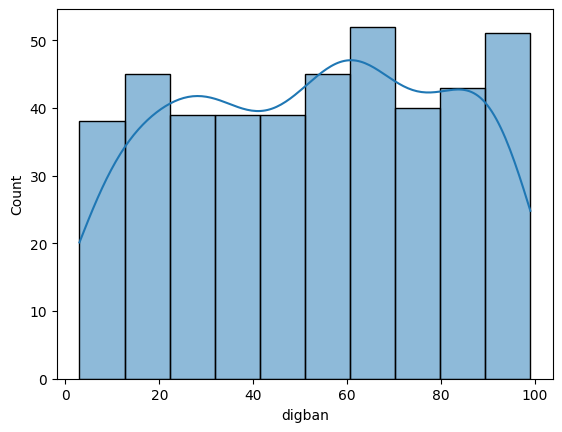

In [241]:
sns.histplot(df['digban'], bins=10, kde=True)

Como se puede ver los valored de digban estan distribuidos muy uniformemente

###Columna Digito:

In [242]:
df.groupby('digito').count()["clave"] / 431 *100

digito
0    99.535963
1     0.232019
5     0.232019
Name: clave, dtype: float64

Los valores atípicos de digito son 1 y 5

([0, 1, 2], [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '5')])

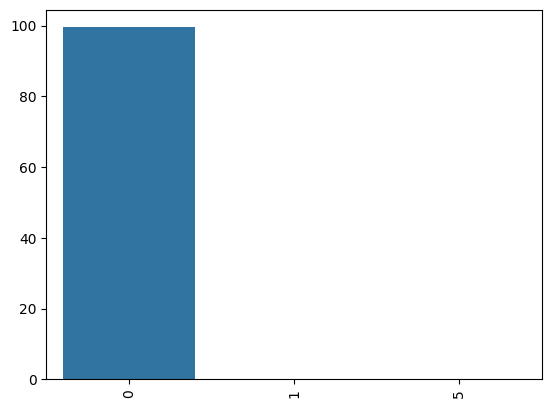

In [243]:
sns.barplot(x=[0,1,5], y=(df.groupby('digito').count()["clave"] / 431 *100).tolist())
plt.xticks(rotation=90)

## - Análisis de estudiantes según el género

In [244]:
df.groupby('sexo').count()["clave"] / 431 *100

sexo
F    48.491879
M    51.508121
Name: clave, dtype: float64

**Análisis 12:**

Como se puede visualizar el porcentaje tanto de niñas como varones es muy similar, siendo el género masculino aproximadamente un 3% mas que el genero femenino

## - Visualizacion en mapa

Procederé a usar las columnas "coloa", "pobla" y "domal" para realizar una visualizacion en mapas y tener una idea a nivel geografico de las direcciones con las que estamos trabajando

In [245]:
# df['direccion_completa'] = df["coloa"] + ", " + df["pobla"] + ", " + df["domal"]

In [246]:
import geocoder

def get_coordinates_from_address(address: str):
    """
    Obtiene las coordenadas geográficas (latitud y longitud) de una dirección en México.

    Utiliza el servicio de geocodificación 'arcgis' de la biblioteca 'geocoder' para convertir
    una dirección física en coordenadas geográficas. La función añade automáticamente ", Mexico."
    al final de la dirección proporcionada para especificar que la búsqueda se realiza dentro de México.

    Parámetros:
    address (str): La dirección para la cual se desean obtener las coordenadas.

    Retorna:
    list: Una lista que contiene la latitud y la longitud de la dirección, o None si la geocodificación falla.

    """
    # result = geocoder.arcgis(location=f"{address}, Mexico.")
    # if result.ok:
    #     lat, lon = result.latlng
    #     return [lat, lon]
    # else:
    #     return None

In [247]:
# def add_coordinates(row):
#     return get_coordinates_from_address(row['direccion_completa'])


# df['coordinates'] = df.apply(add_coordinates, axis=1)

In [248]:
# df['coordinates']

In [249]:
# df[['lat','lon']] = pd.DataFrame(df.coordinates.tolist(), index= df.index)

In [250]:
# import plotly.express as px

# fig = px.scatter_mapbox(df,
#                         lat="lat",
#                         lon="lon",
#                         hover_name="domal",
#                         hover_data=["domal", "coloa", "pobla"],
#                         zoom=8,
#                         height=800,
#                         width=800)

# fig.update_layout(mapbox_style="open-street-map")
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

## - Analisis descriptivo

Se procede a analizar un analisis descriptivo de las columnas numericas

In [251]:
# df.describe()

Como podemos observar se redujo considerablemente el numero de columnas, ya que este analisis solo toma en cuenta valores numericos

Adicionalmente se hizo una busqueda de alumnos cuya madre tuviera multiples padres, con el fin de saber si hay errores de digitacion o si la madre matriculo a varios de sus hijos con multiples padres en el mismo colegio (chisme)

In [252]:
unique_pairs = df.groupby('madre')['padre'].nunique()
non_paired_madre = unique_pairs[unique_pairs > 1].index

result = df[df['madre'].isin(non_paired_madre)]

In [253]:
# result[['madre', "padre", "nombrea"]]

In [254]:
# print(result[['madre', "padre"]].tail(4))

Estos campos de nombres tanto de padres como de madres tienen más de 1 espacio entre si, procedo a modificarla

In [255]:
# df['madre'] = df['madre'].str.replace('  ', ' ', regex=True)
# df['padre'] = df['padre'].str.replace(r'   ', ' ', regex=True)
# print(result[['madre', "padre"]].tail(4))

In [256]:
unique_pairs = df.groupby('padre')['madre'].nunique()
non_paired_padre = unique_pairs[unique_pairs > 1].index

result = df[df['padre'].isin(non_paired_padre)]

In [257]:
# print(result[['madre', "padre", "nombrea"]].head(2))

Se hará un analisis de grupos de columnas que parecen categoricas

In [258]:
df.groupby('plan').count()["clave"] / 431 *100

plan
A     0.232019
B    99.767981
Name: clave, dtype: float64

Interesante que tan pocos estudiantes sean plan A, valdria la pena investigar mas a fondo el por que de esta segregacion

In [259]:
# df.groupby('escpro').count()["clave"] / 431 *100

**11.Errores o datos faltantes encontrados:**

Importante destacar que los errores de I mayuscula e i minuscula, asi como algunos caracteres erroneos suelen ser producto de una mala lectura por parte de un Optical character recognition (OCR).

**13. Analisis realizado:**

Por otro lado se encontro que COLEGIO1 es la clase predominante en los datos con mas del 78%

Se procede a arreglar los errores ocasionados por el OCR

In [260]:
# df['escpro']

In [261]:
df.loc[df.escpro.isin(["nuevo indreso"]), "escpro"] = "nuevo ingreso"
df.loc[df.escpro.isin(["kimdergym ","kimdergym", "kundergym", "kindegym"]), "escpro"] = "kindergym"
df.loc[df.escpro.isin(["cynthia cummingham e"]), "escpro"] = "cynthia cunningham e"
df.loc[df.escpro.isin(["euro", "colegio euro", "euro texcoco"]), "escpro"] = "colegio euro texcoco"
df.loc[df.escpro.isin(["panamericano"]), "escpro"] = "colegio panamericano"

Validamos que los errores se hayan arreglado:

In [262]:
# df.groupby('escpro').count()["clave"] / 431 *100

Ahora se procede a hacer un rapido analisis de frecuencias sobre las 2 columnas tipo fecha 'Date_fechains' y 'Date_fecnaca'.(se excluyo la que tiene gran numero de nulos para no entorpecer el analisis)

Para este analisis se procede a primero ordenar los valores de cada columna correspondietne, para luego eliminar los valores nulos y calcular las diferencias entre fechas, luego se ordenan las diferencias de mayor a menor dando como resultado el hueco mas grande en terminos de dias entre fechas, esto me da una idea de que tan viejos y actualizados pueden estar los datos de fecha.

Tambien se hace una agrupacion de fechas que muestre el conteo de registros correspondientes, para obtener cuantos registros suelen ingresar por dias

In [263]:
date_fechains_sorted = df['Date_fechains'].sort_values()
date_fechains_diff = date_fechains_sorted.diff().dropna()
date_fechains_biggest_gaps = date_fechains_diff.sort_values(ascending=False)

date_fechains_freq = df['Date_fechains'].value_counts().sort_values(ascending=False)

date_fecnaca_sorted = df['Date_fecnaca'].sort_values()
date_fecnaca_diff = date_fecnaca_sorted.diff().dropna()
date_fecnaca_biggest_gaps = date_fecnaca_diff.sort_values(ascending=False)

date_fecnaca_freq = df['Date_fecnaca'].value_counts().sort_values(ascending=False)

In [264]:
# print(date_fechains_biggest_gaps.head(10))

En el resultado se muestra los 10 espacios mas grandes entre fechas, siendo el mayor 61 días sin inserciones de datos lo cual podria corresponder a vacaciones

In [265]:
print(date_fechains_freq.head(10))

Date_fechains
2022-03-31    30
2022-03-30    19
2022-03-24    15
2022-03-28    14
2022-03-16    13
2022-03-29    11
2022-03-15    11
2022-08-26    10
2022-07-29     9
2022-03-17     9
Name: count, dtype: int64


En el resultado se muestra las 10 fechas en las cuales se hicieron mayor numero de inserciones, lo cual corresponde en gran parte a Marzo, esto puede indicar que marzo es fecha de matriculas e inscripciones

In [266]:
print(date_fecnaca_biggest_gaps.head(10))

1     2085 days
9      274 days
328    156 days
106    120 days
85     106 days
430     92 days
24      90 days
255     84 days
388     83 days
365     78 days
Name: Date_fecnaca, dtype: timedelta64[ns]


En el resultado se muestra los 10 espacios mas grandes entre fechas, siendo el mayor 2085 días entre un nacimiento y el siguiente, esto bien puede corresponder a un error de digitacion ejemplo: 2022 vs 2002, o 2011 con 2001, es importante el estudio de dichos elementos atipicos para evaluar donde puede estar el error

In [267]:
print(date_fecnaca_freq.head(10))

Date_fecnaca
2009-10-02    2
2010-12-15    2
2019-08-08    2
2008-04-30    2
2022-08-17    2
2013-07-15    2
2017-11-17    2
2011-06-14    2
2013-04-21    2
2015-09-01    2
Name: count, dtype: int64


En el resultado se muestra las 10 fechas en las cuales se hicieron mayor numero de inserciones, y como se evidencia hay un comportamiento bastante uniforme, lo cual puede ser un poco raro ya que la distribuciones de cumpleaños no suele ser uniforme, sino que suele tener sesgos hacia septiembre y noviembre.

Supongo que al incluir un conjunto de datos mas amplio se evidenciaran mas estos patrones

## -Analisis de edad

In [268]:
df.groupby('edad').count()["clave"] / 431 *100

edad
2.0      0.928074
3.0      0.928074
4.0      4.176334
5.0      3.944316
6.0      4.872390
7.0      7.192575
8.0     10.208817
9.0      5.568445
10.0     6.960557
11.0     8.352668
12.0     8.584687
13.0     8.352668
14.0     6.728538
15.0     9.280742
16.0    12.529002
17.0     0.696056
23.0     0.232019
Name: clave, dtype: float64

**14. Analisis realizado**

Al evaluar el promedio de edad de los estudiantes del colegio, se puede evidenciar que hay 4 casos atípicos como estudiantes de 2,3,17,23.

Se puede deber a errores de trasncripción, o en las edades mas altas, estudiantes que
1- Se ha atrasado mucho en la colegiatura
2- Es un dato de un estudiante 'graduado' que nunca actualizaron
3- Un error de escritura/transcripcion


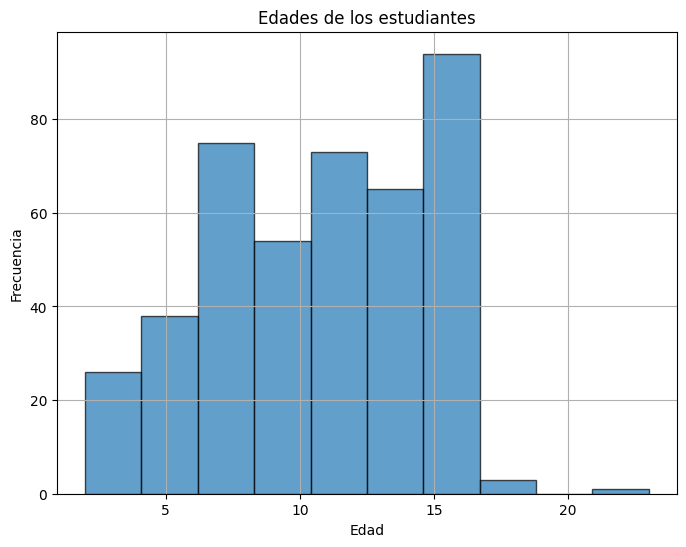

In [269]:
plt.figure(figsize=(8, 6))
plt.hist(df['edad'], bins=10, edgecolor='black', alpha=0.7)

plt.title('Edades de los estudiantes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)

In [270]:
df['edad'].astype('Int64', errors='ignore')

0       6
1      17
2      11
3      11
4       6
       ..
426    15
427    15
428     4
429     5
430     3
Name: edad, Length: 431, dtype: Int64

**Analisis de matriz de correlacion**

Ademas Aprovecho para hacer un analisis de correlacion entre las columnas numericas con fin de encontrar valores que suelen subir o descender en valor inversamente o proporcionalmente

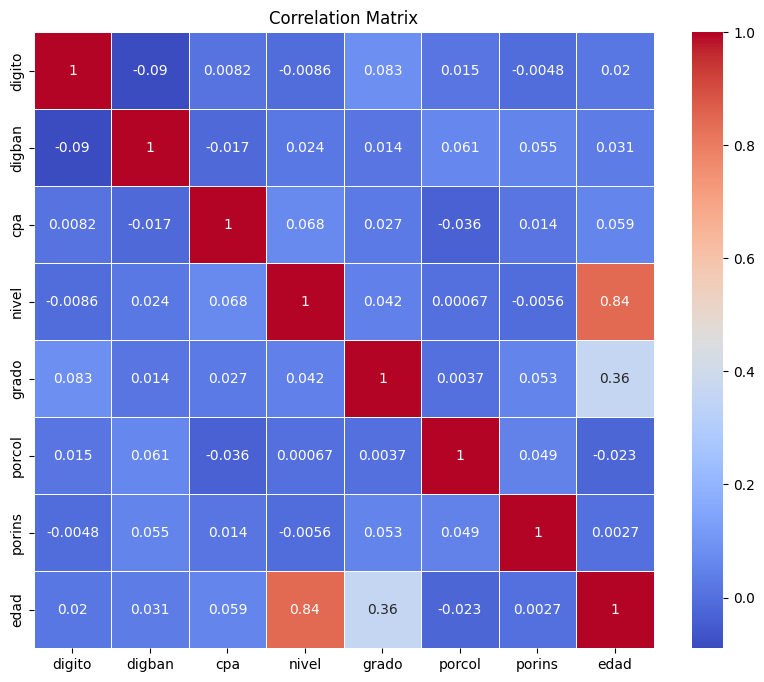

In [271]:
corr_matrix = df[["digito", "digban",	"cpa",	"nivel",	"grado",	"porcol",	"porins", "edad"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**14. Análisis realizado**

Se puede evidenciar una correlación positiva (en este caso, 0.84) significa que a medida que edad aumenta, nivel tiende también a aumentar.

Los valores altos de edad tienden a estar asociados con valores altos de nivel.

Se procede a eliminar coordinates, lat y lon ya que no da información relevante para la base de datos del colegio de alumnos y padres

In [272]:
columnas_de_coordenadas = ["coordinates", "lat", "lon"]
df = df.drop(columnas_de_coordenadas, axis=1)
len(df.columns)

KeyError: "['coordinates', 'lat', 'lon'] not found in axis"

#-Arreglo de nombres de columnas

In [ ]:
# df.rename(columns={"nombrea":"nombre_estudiante", "Date_fecnaca":"fecha_nacimiento","Date_fechains":"fecha_inscripcion","Date_fechbaja":"fecha_retiro","domal":"direccion","naciona":"nacionalidad", "coloa":"localidad","pobla":"poblado", "emailm_corregido":"email_madre", "emprem":"empresa_madre" ,"ocupam": "ocupacion_madre", "celularm": "celular_madre", "telofm":"telefono_madre","emailp_corregido":"email_padre", "ocupap": "ocupacion_padre", "celularp": "celular_padre","escpro":"escuela" , "tela":"telefono_estudiante","telofp":"telefono_padre","Date_fechnaca":"fecha_nacimiento", "pedi": "pediatra", "telpedi": "telefono_pediatra", "emprep":"empresa_padre"})